In [5]:
%load_ext autoreload
%autoreload 2

#--Colab--------
try:
    import google.colab
    IN_COLAB = True
    import os
except:
    IN_COLAB = False

if IN_COLAB and os.getcwd()=='/content':
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/MyDrive/colab/telecom/stl-aclearn/')
    !pip install skorch
    !pip install modAL
#---------------

from aclearn.dataset import AcLearnDataset
from aclearn.model import AcLearnModel
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import sys

In [ ]:
PATH_TO_FIGURE = 'history/figures/'
NOW = datetime.datetime.now().strftime('_%d_%m_%Y_%H_%M_%S')

In [22]:
data_path = 'data/mnist_data.npy'
label_path = 'data/mnist_labels.npy'
size_init_per_class = 1

mnist_dataset = AcLearnDataset(data_path, label_path, size_init_per_class=size_init_per_class)

In [ ]:
data_path = 'demo_mnist'
size_init_per_class = 1

mnist_dataset = AcLearnDataset(data_path, size_init_per_class=size_init_per_class)

model_uniform_mnist = AcLearnModel('uniform', dataset=mnist_dataset)
model_max_entropy_mnist = AcLearnModel('max_entropy', dataset=mnist_dataset)
model_bald_mnist = AcLearnModel('bald', dataset=mnist_dataset)
model_varratio_mnist = AcLearnModel('variation_ratio', dataset=mnist_dataset)

In [ ]:
%%time

print('compute max accuracy for Mnist')
model_uniform_mnist.evaluate_max()
print(f'max accuracy: {model_uniform_mnist.max_accuracy}')
model_max_entropy_mnist.max_accuracy = model_uniform_mnist.max_accuracy
model_bald_mnist.max_accuracy = model_uniform_mnist.max_accuracy
model_varratio_mnist.max_accuracy = model_uniform_mnist.max_accuracy

compute max accuracy for Mnist
max accuracy: 0.9941
CPU times: user 1min 47s, sys: 2.2 s, total: 1min 49s
Wall time: 1min 49s


In [ ]:
n_queries = 50
query_size = 50

print(f'--- [{dataset_name}] Training uniform :')
time_start = time.time()
model_uniform_mnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
delta_time = time.time()-time_start
print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

print(f'--- [{dataset_name}] Training max_entropy :')
time_start = time.time()
model_max_entropy_mnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
delta_time = time.time()-time_start
print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

print(f'--- [{dataset_name}] Training bald :')
time_start = time.time()
model_bald_mnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
delta_time = time.time()-time_start
print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

print(f'--- [{dataset_name}] Training var_ration :')
time_start = time.time()
model_varratio_mnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
delta_time = time.time()-time_start
print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

--- [MNIST] Training uniform :
(query 1) Train acc: 	0.4432  |  Test acc: 	0.4517
(query 2) Train acc: 	0.7083  |  Test acc: 	0.7144
(query 3) Train acc: 	0.7420  |  Test acc: 	0.7426
(query 4) Train acc: 	0.8367  |  Test acc: 	0.8481
(query 5) Train acc: 	0.8388  |  Test acc: 	0.8498
(query 6) Train acc: 	0.8572  |  Test acc: 	0.8665
(query 7) Train acc: 	0.8827  |  Test acc: 	0.8905
(query 8) Train acc: 	0.8848  |  Test acc: 	0.8883
(query 9) Train acc: 	0.8965  |  Test acc: 	0.9018
(query 10) Train acc: 	0.9091  |  Test acc: 	0.9132
(query 11) Train acc: 	0.9210  |  Test acc: 	0.9251
(query 12) Train acc: 	0.9244  |  Test acc: 	0.9307
(query 13) Train acc: 	0.9256  |  Test acc: 	0.9314
(query 14) Train acc: 	0.9293  |  Test acc: 	0.9343
(query 15) Train acc: 	0.9365  |  Test acc: 	0.9425
(query 16) Train acc: 	0.9336  |  Test acc: 	0.9373
(query 17) Train acc: 	0.9358  |  Test acc: 	0.9451
(query 18) Train acc: 	0.9409  |  Test acc: 	0.9486
(query 19) Train acc: 	0.9439  |  Test acc

In [6]:
dataset_name = 'demo_fmnist'
nb_init_label_per_class = 1

fashion_dataset = AcLearnDataset(nb_init_label_per_class, dataset_name)

model_uniform_fmnist = AcLearnModel('uniform', dataset=fashion_dataset)
model_max_entropy_fmnist = AcLearnModel('max_entropy', dataset=fashion_dataset)
model_bald_fmnist = AcLearnModel('bald', dataset=fashion_dataset)
model_varratio_fmnist = AcLearnModel('variation_ratio', dataset=fashion_dataset)

print('compute max accuracy for FashionMnist')
model_uniform_fmnist.evaluate_max()
print(f'max accuracy: {model_uniform_fmnist.max_accuracy}')
model_max_entropy_fmnist.max_accuracy = model_uniform_fmnist.max_accuracy
model_bald_fmnist.max_accuracy = model_uniform_fmnist.max_accuracy
model_varratio_fmnist.max_accuracy = model_uniform_fmnist.max_accuracy

compute max accuracy for FashionMnist
max accuracy: 0.9292


In [7]:
n_queries = 50
query_size = 50

print(f'--- [{dataset_name}] Training uniform :')
time_start = time.time()
model_uniform_fmnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
delta_time = time.time()-time_start
print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

print(f'--- [{dataset_name}] Training max_entropy :')
time_start = time.time()
model_max_entropy_fmnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
delta_time = time.time()-time_start
print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}sn')

print(f'--- [{dataset_name}] Training bald :')
time_start = time.time()
model_bald_fmnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
delta_time = time.time()-time_start
print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

print(f'--- [{dataset_name}] Training var_ration :')
delta_time = time.time()-time_start
model_varratio_fmnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

--- [FashionMNIST] Training uniform :
--- [FashionMNIST] Training uniform :
--- [FashionMNIST] Training uniform :
(query 1) Train acc: 	0.5473  |  Test acc: 	0.5470
(query 1) Train acc: 	0.5473  |  Test acc: 	0.5470
(query 1) Train acc: 	0.5473  |  Test acc: 	0.5470
(query 2) Train acc: 	0.6642  |  Test acc: 	0.6564
(query 2) Train acc: 	0.6642  |  Test acc: 	0.6564
(query 2) Train acc: 	0.6642  |  Test acc: 	0.6564
(query 3) Train acc: 	0.6981  |  Test acc: 	0.6904
(query 3) Train acc: 	0.6981  |  Test acc: 	0.6904
(query 3) Train acc: 	0.6981  |  Test acc: 	0.6904
(query 4) Train acc: 	0.7276  |  Test acc: 	0.7201
(query 4) Train acc: 	0.7276  |  Test acc: 	0.7201
(query 4) Train acc: 	0.7276  |  Test acc: 	0.7201
(query 5) Train acc: 	0.7553  |  Test acc: 	0.7522
(query 5) Train acc: 	0.7553  |  Test acc: 	0.7522
(query 5) Train acc: 	0.7553  |  Test acc: 	0.7522
(query 6) Train acc: 	0.7609  |  Test acc: 	0.7587
(query 6) Train acc: 	0.7609  |  Test acc: 	0.7587
(query 6) Train acc

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 40

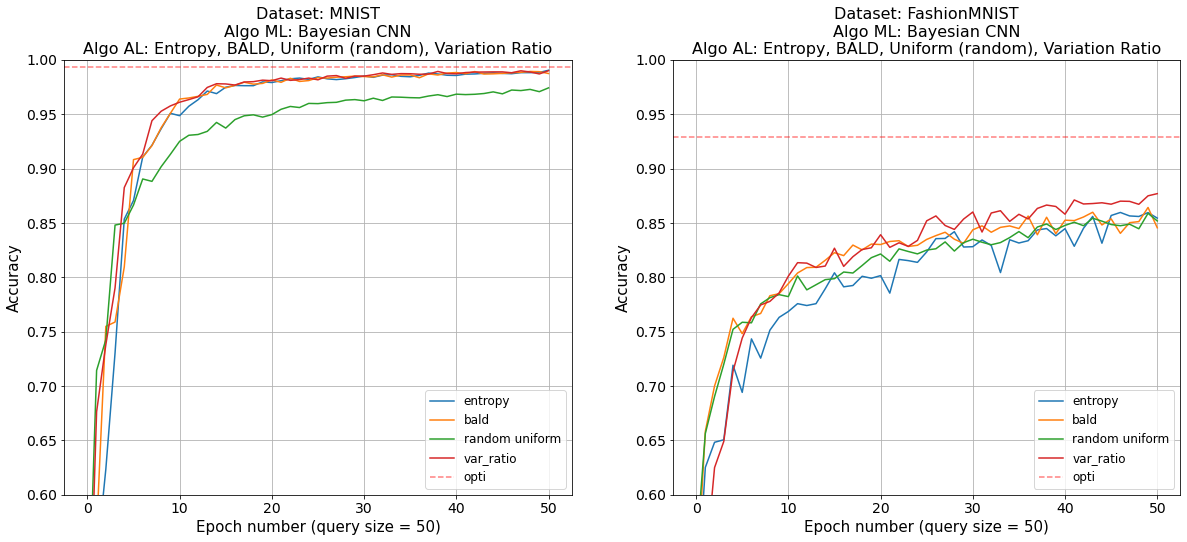

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.title(f'Dataset: MNIST\nAlgo ML: Bayesian CNN\nAlgo AL: Entropy, BALD, Uniform (random), Variation Ratio',fontsize=16)
plt.plot(model_max_entropy_mnist.acc_history, label='entropy')
plt.plot(model_bald_mnist.acc_history, label='bald')
plt.plot(model_uniform_mnist.acc_history, label='random uniform')
plt.plot(model_varratio_mnist.acc_history, label='var_ratio')
plt.ylim([0.6,1]);plt.grid();plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.axhline(y=model_max_entropy_mnist.max_accuracy,linestyle='--',c='r',label='opti',alpha=0.5)
plt.xlabel(f'Epoch number (query size = {query_size})',fontsize=15); plt.ylabel('Accuracy',fontsize=15)
plt.legend(fontsize=12)

plt.subplot(122)
plt.title(f'Dataset: FashionMNIST\nAlgo ML: Bayesian CNN\nAlgo AL: Entropy, BALD, Uniform (random), Variation Ratio',fontsize=16)
plt.plot(model_max_entropy_fmnist.acc_history, label='entropy')
plt.plot(model_bald_fmnist.acc_history, label='bald')
plt.plot(model_uniform_fmnist.acc_history, label='random uniform')
plt.plot(model_varratio_fmnist.acc_history, label='var_ratio')
plt.axhline(y=model_max_entropy_fmnist.max_accuracy,linestyle='--',c='r',label='opti',alpha=0.5)
plt.ylim([0.6,1]);plt.grid();plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xlabel(f'Epoch number (query size = {query_size})',fontsize=15); plt.ylabel('Accuracy',fontsize=15)
plt.legend(fontsize=12)

plt.show()
plt.savefig(PATH_TO_FIGURE+'comp_aquisition_func_bis');

In [ ]:
sns.set()
plt.figure(figsize=(20,10))

plt.subplot(241)
plt.title("MNIST - Uniform")
plt.plot(model_uniform_mnist.acc_history, label='test')
plt.plot(model_uniform_mnist.acc_train_history, label='train')
plt.legend()

plt.subplot(242)
plt.title("MNIST - Entropy")
plt.plot(model_max_entropy_mnist.acc_history, label='test')
plt.plot(model_max_entropy_mnist.acc_train_history, label='train')
plt.legend()

plt.subplot(243)
plt.title("MNIST - Bald")
plt.plot(model_bald_mnist.acc_history, label='test')
plt.plot(model_bald_mnist.acc_train_history, label='train')
plt.legend()

plt.subplot(244)
plt.title("MNIST - Var_Ratio")
plt.plot(model_varratio_mnist.acc_history, label='test')
plt.plot(model_varratio_mnist.acc_train_history, label='train')
plt.legend()

plt.subplot(245)
plt.title("FashionMNIST - Uniform")
plt.plot(model_uniform_fmnist.acc_history, label='test')
plt.plot(model_uniform_fmnist.acc_train_history, label='train')
plt.legend()

plt.subplot(246)
plt.title("FashionMNIST - Entropy")
plt.plot(model_max_entropy_fmnist.acc_history, label='test')
plt.plot(model_max_entropy_fmnist.acc_train_history, label='train')
plt.legend()

plt.subplot(247)
plt.title("FashionMNIST - Bald")
plt.plot(model_bald_fmnist.acc_history, label='test')
plt.plot(model_bald_fmnist.acc_train_history, label='train')
plt.legend()

plt.subplot(248)
plt.title("FashionMNIST - Var_Ratio")
plt.plot(model_varratio_fmnist.acc_history, label='test')
plt.plot(model_varratio_fmnist.acc_train_history, label='train')
plt.legend()

plt.show()
plt.savefig(PATH_TO_FIGURE+'comp_train_test_bis')